In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/home/scott/GIT/psu_python/Project/')
from sklearn.cluster import KMeans

class DATA:
    def __init__(self,list={}):
        self.frames = [pd.read_excel("./data/"+file) for file in list]
        self.data = pd.concat(self.frames,sort=True)
        
        
    def getBins(self,binCount):
        self.zbins = []
        cdf = self.data[['z','value']]
        trainingData = np.array(cdf.z).reshape(-1,1)
        X = np.vstack((np.array(data.data['z']),np.array(data.data['value']))).T
        k_means = KMeans(init = "k-means++", n_clusters = binCount, n_init = 1000)
        k_means.fit(trainingData)
        self.data['bins'] = k_means.labels_
        #for i in range(binCount):
        #    mask = data.data[data.data['bins'] == i]
        #    self.zbins.append((round(min(mask['z']),2),round(max(mask['z']),2)))
        colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
        plt.figure(1)
        k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
        for k, col in zip(range(binCount), colors):
            mask = data.data[data.data['bins'] == k]
            self.zbins.append((round(min(mask['z']),2),round(max(mask['z']),2)))
            my_members = k_means.labels_ == k
            cluster_center = k_means_cluster_centers[k]
            plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=14)
            #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            #markeredgecolor='k', markersize=6)
        plt.title('Number of clusters: %d' % binCount)
        
        plt.legend(np.array(range(1,binCount+1)))
        plt.show()
        return self.zbins
    
if __name__ == '__main__':
    hermes = DATA({"1000.xlsx"})

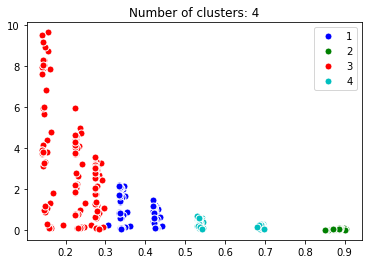

[(0.14, 0.3), (0.31, 0.44), (0.53, 0.7), (0.85, 0.9)]


In [214]:
data = DATA({'1000.xlsx'})
zbins = sorted(data.getBins(4))
print(zbins)

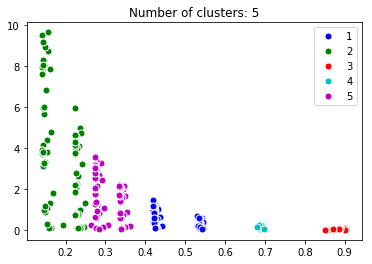

[(0.14, 0.25), (0.26, 0.36), (0.42, 0.55), (0.68, 0.7), (0.85, 0.9)]


In [215]:
zbins = sorted(data.getBins(5))
print(zbins)

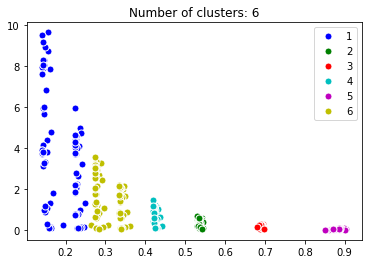

[(0.14, 0.25), (0.26, 0.36), (0.42, 0.44), (0.53, 0.55), (0.68, 0.7), (0.85, 0.9)]


In [216]:
zbins = sorted(data.getBins(6))
print(zbins)

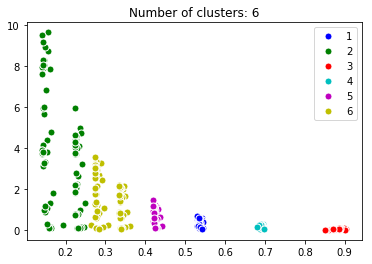

[(0.14, 0.25), (0.26, 0.36), (0.42, 0.44), (0.53, 0.55), (0.68, 0.7), (0.85, 0.9)]


In [217]:
zbins = sorted(data.getBins(6))
print(zbins)

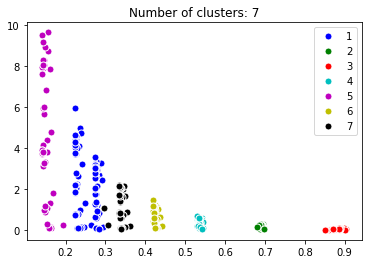

[(0.14, 0.19), (0.22, 0.29), (0.3, 0.36), (0.42, 0.44), (0.53, 0.55), (0.68, 0.7), (0.85, 0.9)]


In [218]:
zbins = sorted(data.getBins(7))
print(zbins)

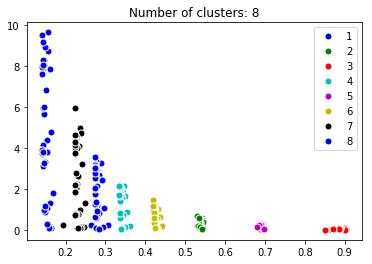

[(0.14, 0.17), (0.19, 0.25), (0.26, 0.31), (0.33, 0.36), (0.42, 0.44), (0.53, 0.55), (0.68, 0.7), (0.85, 0.9)]


In [219]:
zbins = sorted(data.getBins(8))
print(zbins)